In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12,6)

In [2]:
data= pd.read_csv("driver-data.csv")
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=2) # n_cluster  Represents the number of time the k-means algorithm will be run independently

In [7]:
df_analyze = data.drop("id", axis =1)
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

kmeans.fit(df_analyze)

In [8]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [9]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 0 0 0]
4000


In [10]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [11]:
unique , count = np.unique(kmeans.labels_ , return_counts=True)
print(dict(zip(unique , count)))

{0: 800, 1: 3200}


In [12]:
df_analyze["cluster"] = kmeans.labels_

In [13]:
sns.set_style("whitegrid")

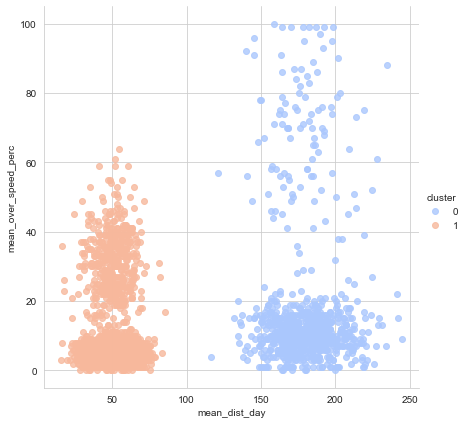

In [14]:
sns.lmplot('mean_dist_day','mean_over_speed_perc' , data =df_analyze ,
          hue ="cluster",palette = 'coolwarm',size =6 , aspect=1 ,fit_reg = False)

In [15]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(data.drop("id", axis =1))
kmeans_4.fit(data.drop("id", axis =1))
print(kmeans_4.cluster_centers_)

unique , count = np.unique(kmeans_4.labels_ , return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique , count)))

[[ 50.46127059  32.42823529]
 [180.34311782  10.52011494]
 [ 49.98428468   5.21441441]
 [177.83509615  70.28846154]]
{0: 425, 1: 696, 2: 2775, 3: 104}


In [16]:
df_analyze["cluster"] = kmeans_4.labels_

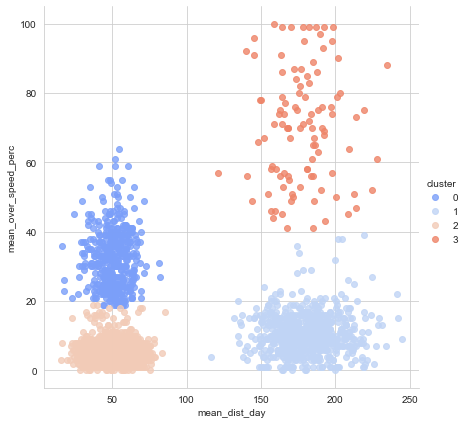

In [17]:
sns.set_style("whitegrid")
sns.lmplot('mean_dist_day','mean_over_speed_perc' , data =df_analyze ,
          hue ="cluster",palette = 'coolwarm',size =6 , aspect=1 ,fit_reg = False)

In [19]:
plot_model(kmeans, plot = 'elbow')

NameError: name 'plot_model' is not defined